# import 

In [2]:
from Utilities.utils import *
# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ed1_data_dict = load_h5(os.path.join(current_working_dir,r"ED1_data.h5"))
# convert data types to python friendly formats
ed1_data_dict = convert_loaded_data(ed1_data_dict)

c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_1\Utilities\utils.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: float(x) if isinstance(x, str) and x.replace('.','',1).isdigit() else x)


# figure b.

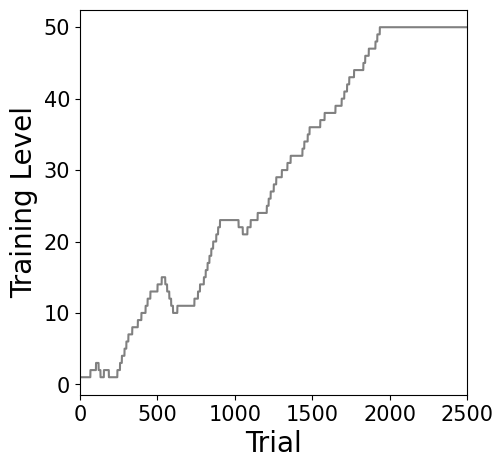

In [3]:
example_learning_curve= ed1_data_dict['example_learning_curve']
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(example_learning_curve,color = 'grey')
ax.set_xlim([0, 2500])
plt.ylabel('Training Level',size = 20)
plt.xlabel('Trial',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

# figure c.

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_10988\3468892669.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'


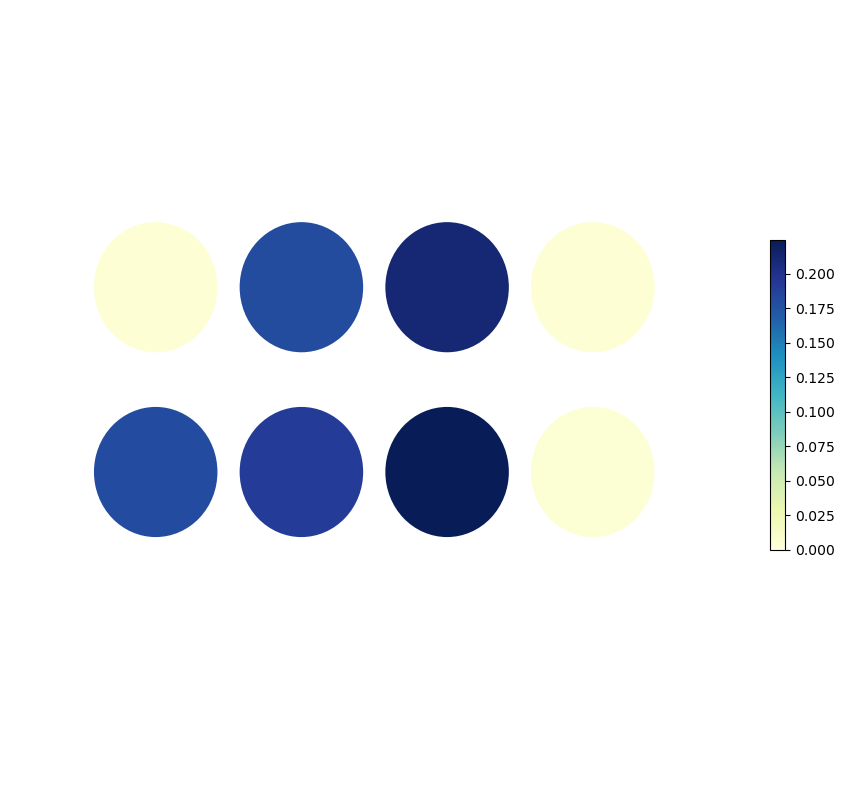

In [4]:
poke_proportions_df = ed1_data_dict['poke_proportions_df']

fig,ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_ylim([0, 5])
ax.set_xlim([0, 5])
colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'
color_vals = [np.mean(poke_proportions_df.p1),np.mean(poke_proportions_df.p2),np.mean(poke_proportions_df.p3),np.mean(poke_proportions_df.p4),
              np.mean(poke_proportions_df.p5),np.mean(poke_proportions_df.p6),np.mean(poke_proportions_df.p7),np.mean(poke_proportions_df.p8)]
normalised_colour = np.array(color_vals)/max(color_vals)
x = [1,2,3,4,1,2,3,4]
y = [2,2,2,2,3.2,3.2,3.2,3.2]
circles_ = []
for i in range(8):
    color_ = colormap(normalised_colour[i])
    circles_ = circles_ + [plt.Circle((x[i], y[i]), 0.4,fill=True, linewidth=5, color = color_)]
for i in range(8):
    ax.add_artist(circles_[i])
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=max(color_vals))
plt.colorbar(sm,fraction=0.02, pad=0.04,ax=ax)

# figure d. 

Text(0.5, 1.0, 'R-squared: 0.73')

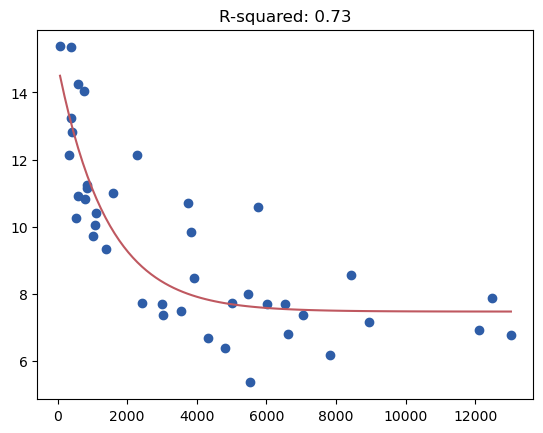

In [6]:
# reload origional df
out_df = ed1_data_dict['out_df']

mean_stds = []
tstarts = []
for index,t_start in enumerate(out_df.trials_at_start):
    tstarts += [t_start]
    mean_std = np.mean([out_df.std1.values[index],out_df.std2.values[index],out_df.std3.values[index],out_df.std4.values[index]])
    mean_stds += [mean_std/out_df.dist_per_cm[index]]
mean_stds = np.array(mean_stds)[np.argsort(tstarts)]
tstarts = np.array(tstarts)[np.argsort(tstarts)]    

# Define the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

ydata = mean_stds* 100
xdata = tstarts/tstarts[-1]

# initial guesses
a0 = ydata[0] - ydata[-1]
b0 = 1 / (max(xdata) - min(xdata))
c0 = ydata[-1]

p0 = [a0, b0, c0]

# Fit the data
popt, pcov = curve_fit(func, xdata, ydata,p0=p0, maxfev=5000)

# Calculate R-squared
residuals = ydata - func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata - np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

# Generate points for the fitted curve
xfit = np.linspace(min(xdata), max(xdata), 100)
yfit = func(xfit, *popt)

# Plot the results
plt.scatter(xdata* tstarts[-1], ydata, color = '#2E5DA7')
plt.plot(xfit * tstarts[-1], yfit, '-', color = '#BF5860')
plt.title(f'R-squared: {r_squared:.2f}')
# plt.show()